# Chapter 2

a simple code example to illustrate the backpropagation algorithm for updating weights in a neural network during training using Python and NumPy:

In this example, we define a simple neural network with one hidden layer and use the sigmoid activation function. The backpropagation algorithm updates the weights of the hidden and output layers based on the calculated errors. The network is trained using XOR logic, and the final predicted output is printed after training.

Keep in mind that this is a simplified example for educational purposes. In real-world scenarios, deep learning frameworks like TensorFlow or PyTorch are commonly used to build and train more complex neural networks.

In [2]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define neural network architecture
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output_labels = np.array([[0], [1], [1], [0]])

input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

# Initialize weights and biases
np.random.seed(42)
hidden_weights = np.random.uniform(size=(input_layer_size, hidden_layer_size))
output_weights = np.random.uniform(size=(hidden_layer_size, output_layer_size))

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(input_data, hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, output_weights)
    predicted_output = sigmoid(output_layer_input)
    
    # Calculate error
    error = output_labels - predicted_output
    
    # Backpropagation
    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    output_weights += hidden_layer_output.T.dot(d_output) * learning_rate
    hidden_weights += input_data.T.dot(d_hidden_layer) * learning_rate

# Test the trained network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_hidden_layer = sigmoid(np.dot(test_input, hidden_weights))
test_output = sigmoid(np.dot(test_hidden_layer, output_weights))

print("Predicted Output after Training:")
print(test_output)


Predicted Output after Training:
[[0.20367442]
 [0.73604558]
 [0.73605935]
 [0.3436884 ]]


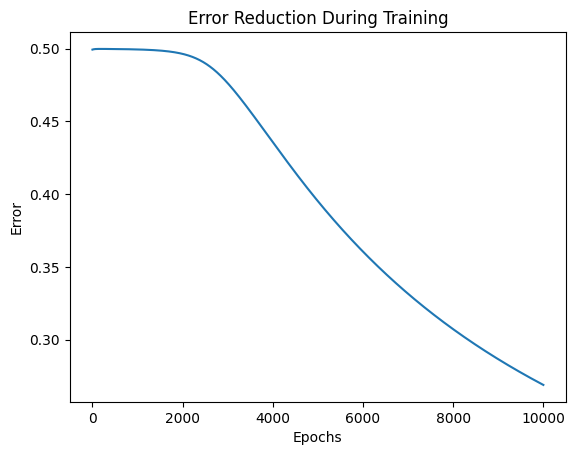

Predicted Output after Training:
[[0.20367442]
 [0.73604558]
 [0.73605935]
 [0.3436884 ]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define neural network architecture
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output_labels = np.array([[0], [1], [1], [0]])

input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

# Initialize weights and biases
np.random.seed(42)
hidden_weights = np.random.uniform(size=(input_layer_size, hidden_layer_size))
output_weights = np.random.uniform(size=(hidden_layer_size, output_layer_size))

# Training parameters
learning_rate = 0.1
epochs = 10000

# Lists to store error values for visualization
error_values = []

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(input_data, hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, output_weights)
    predicted_output = sigmoid(output_layer_input)
    
    # Calculate error
    error = output_labels - predicted_output
    error_values.append(np.mean(np.abs(error)))  # Store error for visualization
    
    # Backpropagation
    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    output_weights += hidden_layer_output.T.dot(d_output) * learning_rate
    hidden_weights += input_data.T.dot(d_hidden_layer) * learning_rate

# Plot error values over epochs
plt.plot(range(epochs), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Reduction During Training')
plt.show()

# Test the trained network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_hidden_layer = sigmoid(np.dot(test_input, hidden_weights))
test_output = sigmoid(np.dot(test_hidden_layer, output_weights))

print("Predicted Output after Training:")
print(test_output)


 # A more complex example of the backpropagation algorithm using TensorFlow and a freely available dataset, the MNIST dataset for digit classification.
    In this example, we're using the popular MNIST dataset to classify handwritten digits. We build a neural network model using TensorFlow's Keras API. The model has an input layer, a hidden layer with 512 units and ReLU activation, and an output layer with 10 units for digit classification using softmax activation.

The SGD optimizer is used for training, and the categorical cross-entropy loss function is employed. We train the model for 10 epochs and evaluate its accuracy on the test dataset.

This example showcases how backpropagation is used in a real-world scenario for training a neural network to perform image classification. The TensorFlow library simplifies the process of creating, training, and evaluating complex neural network models.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Build a neural network model
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using backpropagation
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


11490434/11490434 [==============================] - 2s 0us/step


Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 1.2330 - accuracy: 0.7199 - val_loss: 0.6845 - val_accuracy: 0.8579
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.5896 - accuracy: 0.8647 - val_loss: 0.4710 - val_accuracy: 0.8859
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4613 - accuracy: 0.8849 - val_loss: 0.3982 - val_accuracy: 0.8968
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4051 - accuracy: 0.8941 - val_loss: 0.3606 - val_accuracy: 0.9045
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3718 - accuracy: 0.9006 - val_loss: 0.3369 - val_accuracy: 0.9083
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3488 - accuracy: 0.9051 - val_loss: 0.3182 - val_accuracy: 0.9122
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3313 - accuracy: 0.9090 - val_loss: 0.3048 - val_accuracy: 0.9158
Epoch 

Epoch 1/10
375/375 [==============================] - 30s 24ms/step - loss: 1.2080 - accuracy: 0.7354 - val_loss: 0.6748 - val_accuracy: 0.8621
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.5855 - accuracy: 0.8657 - val_loss: 0.4699 - val_accuracy: 0.8888
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4607 - accuracy: 0.8839 - val_loss: 0.3987 - val_accuracy: 0.8982
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4054 - accuracy: 0.8935 - val_loss: 0.3607 - val_accuracy: 0.9047
Epoch 5/10
375/375 [==============================] - 2s 7ms/step - loss: 0.3720 - accuracy: 0.9002 - val_loss: 0.3367 - val_accuracy: 0.9099
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3493 - accuracy: 0.9042 - val_loss: 0.3197 - val_accuracy: 0.9131
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3319 - accuracy: 0.9081 - val_loss: 0.3063 - val_accuracy: 0.9160
Epoc

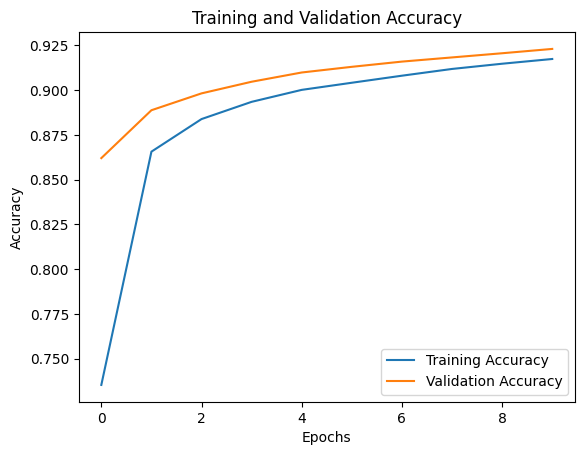

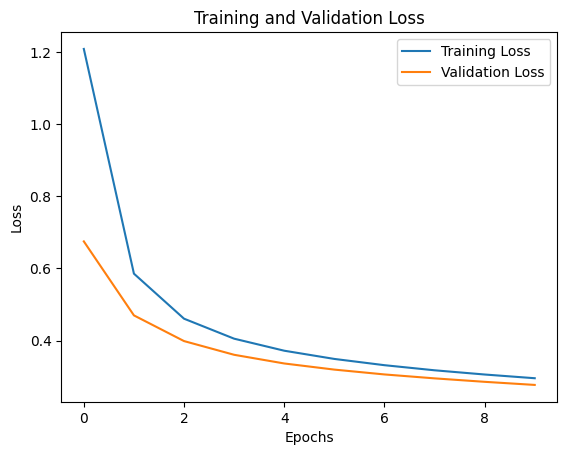

313/313 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.9238
Test accuracy: 0.923799991607666


In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Build a neural network model
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using backpropagation
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 1.2257 - accuracy: 0.7301 - val_loss: 0.6829 - val_accuracy: 0.8588
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.5921 - accuracy: 0.8618 - val_loss: 0.4735 - val_accuracy: 0.8869
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4650 - accuracy: 0.8822 - val_loss: 0.4010 - val_accuracy: 0.8975
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4087 - accuracy: 0.8915 - val_loss: 0.3630 - val_accuracy: 0.9039
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3754 - accuracy: 0.8981 - val_loss: 0.3393 - val_accuracy: 0.9082
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 0.3522 - accuracy: 0.9032 - val_loss: 0.3214 - val_accuracy: 0.9119
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3344 - accuracy: 0.9079 - val_loss: 0.3079 - val_accuracy: 0.9156
Epoch 

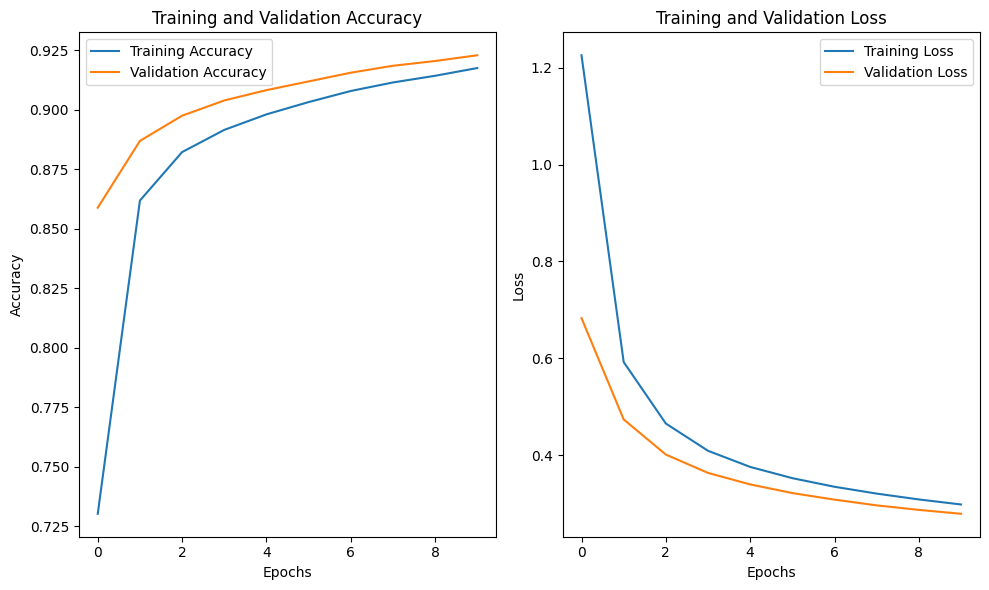

313/313 [==============================] - 11s 36ms/step - loss: 0.2794 - accuracy: 0.9248
Test accuracy: 0.9247999787330627


In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Build a neural network model
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using backpropagation
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Plot training and validation accuracy along with loss
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


# Let's use the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. Here's a more complex example using TensorFlow and the CIFAR-10 dataset for image classification:

In this example, we're using the CIFAR-10 dataset for image classification. We build a convolutional neural network (CNN) model using TensorFlow's Keras API. The model consists of three convolutional layers with ReLU activation and max-pooling layers, followed by fully connected (dense) layers.

The Adam optimizer is used for training, and the sparse categorical cross-entropy loss function is employed. We train the model for 10 epochs and evaluate its accuracy on the test dataset.

This example demonstrates how backpropagation is used in a more complex scenario, involving convolutional layers and image data. The CIFAR-10 dataset provides a diverse set of images, making the classification task more challenging. TensorFlow's capabilities enable us to easily construct and train complex models for real-world applications.

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Build a convolutional neural network (CNN) model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using backpropagation
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


170498071/170498071 [==============================] - 29s 0us/step
Epoch 1/10
625/625 [==============================] - 45s 64ms/step - loss: 1.5615 - accuracy: 0.4277 - val_loss: 1.3607 - val_accuracy: 0.5093
Epoch 2/10
625/625 [==============================] - 48s 76ms/step - loss: 1.1869 - accuracy: 0.5790 - val_loss: 1.2260 - val_accuracy: 0.5816
Epoch 3/10
625/625 [==============================] - 48s 77ms/step - loss: 1.0296 - accuracy: 0.6393 - val_loss: 1.0343 - val_accuracy: 0.6417
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.9144 - accuracy: 0.6800 - val_loss: 0.9348 - val_accuracy: 0.6749
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.8354 - accuracy: 0.7072 - val_loss: 0.9005 - val_accuracy: 0.6862
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.7555 - accuracy: 0.7369 - val_loss: 0.8519 - val_accuracy: 0.7076
Epoch 7/10
625/625 [==============================] - 54s 86ms/step 

#  This code demonstrates the backpropagation algorithm for updating weights in a neural network during training using the Iris dataset. It includes the training loop, forward and backward passes, weight updates, and plotting of accuracy and loss graphs.
Let's consider a more complex classification problem using the Iris dataset. We'll build a neural network to classify iris flowers into three species based on their sepal and petal measurements. We'll use a simple feedforward neural network and implement backpropagation from scratch. We'll also generate accuracy and loss graphs to visualize the training process.
In this example, we use the Iris dataset to build a neural network with one hidden layer to classify iris flowers into three species. We manually initialize weights and biases, perform forward and backward passes, and update the weights and biases using the backpropagation algorithm. The accuracy of the trained model is printed at the end.

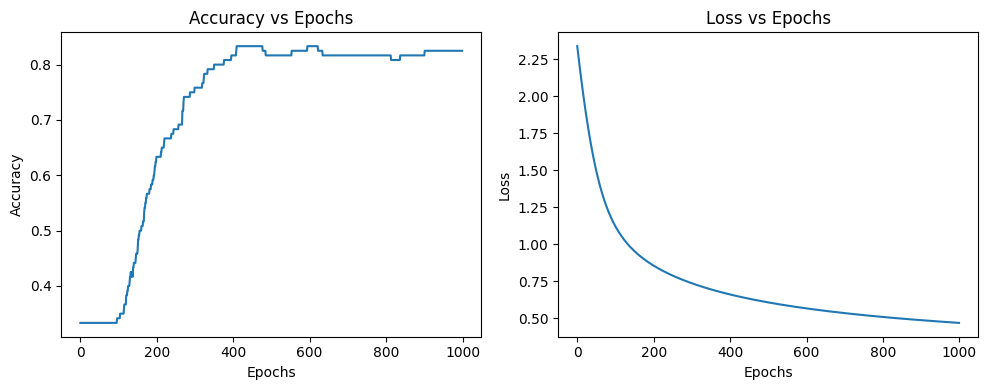

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Normalize input features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# One-hot encode the target labels
y_onehot = np.zeros((y.shape[0], 3))
y_onehot[np.arange(y.shape[0]), y.flatten()] = 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Initialize neural network parameters
input_size = X_train.shape[1]
hidden_size = 10
output_size = 3
learning_rate = 0.01

# Initialize weights and biases
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Softmax activation function
def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Training loop
epochs = 1000
accuracy_list = []
loss_list = []
for epoch in range(epochs):
    # Forward pass
    hidden_output = sigmoid(np.dot(X_train, weights_input_hidden) + bias_hidden)
    predicted = softmax(np.dot(hidden_output, weights_hidden_output) + bias_output)
    
    # Backpropagation
    output_error = predicted - y_train
    output_delta = output_error / len(X_train)
    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    
    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, output_delta)
    bias_output -= learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, hidden_delta)
    bias_hidden -= learning_rate * np.sum(hidden_delta, axis=0)
    
    # Calculate accuracy and loss for this epoch
    predicted_labels = np.argmax(predicted, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)
    loss = -np.mean(np.log(predicted[range(len(X_train)), true_labels]))
    
    accuracy_list.append(accuracy)
    loss_list.append(loss)

# Plot accuracy and loss graphs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

plt.tight_layout()
plt.show()


# Python code to visualize the activation functions using the Matplotlib library. Make sure you have Matplotlib installed in your Python environment before running the code.

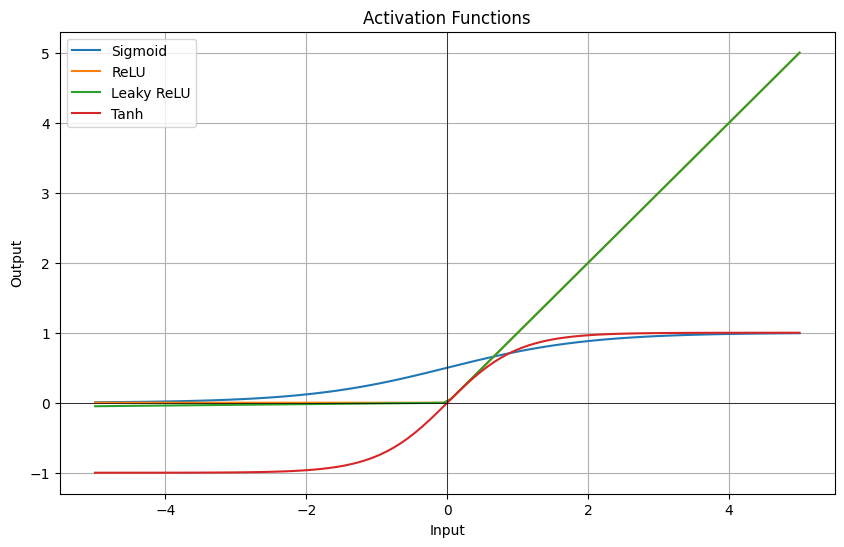

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU (Rectified Linear Unit) Function
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU Function
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

# Tanh (Hyperbolic Tangent) Function
def tanh(x):
    return np.tanh(x)

# Softmax Function
def softmax(x):
    exp_x = np.exp(x - np.max(x)) # for numerical stability
    return exp_x / np.sum(exp_x, axis=0)

# Generate input values
x = np.linspace(-5, 5, 100)

# Calculate the corresponding outputs for each activation function
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)
y_tanh = tanh(x)

# Plot the activation functions
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_leaky_relu, label='Leaky ReLU')
plt.plot(x, y_tanh, label='Tanh')
plt.legend()
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


## Let's explore an illustrative example to gain a deeper understanding of forward propagation. Envision a dataset consisting of data points arranged in a non-linearly separable manner, resembling two interlocking crescent moons that correspond to distinct classes. To visualize this, we can utilize the make_circles() function available in the sklearn.datasets module. 

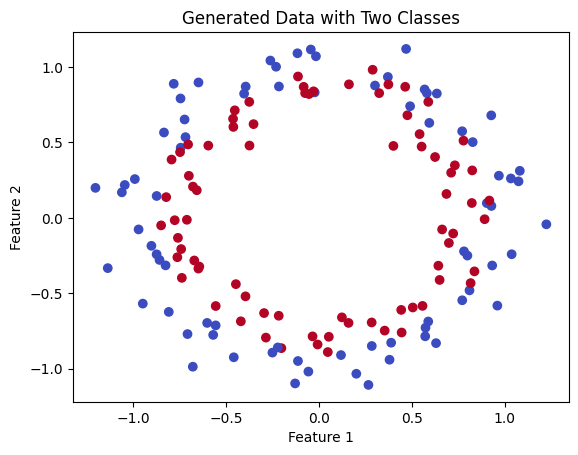

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

np.random.seed(42)
data_new, labels_new = make_circles(n_samples=150, noise=0.1, random_state=42)
plt.scatter(data_new[:, 0], data_new[:, 1], c=labels_new, cmap="coolwarm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Data with Two Classes")
plt.show()


# Multi-Layer Perceptron

## Lets demonstrates the implementation of a simple neural network using TensorFlow and Keras for image classification. This neural network, known as a Multi-Layer Perceptron (MLP), is designed to recognize handwritten digits from the MNIST dataset. The MNIST dataset is a well-known dataset widely used as a benchmark in the field of machine learning.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2517 - accuracy: 0.9283
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1105 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9828
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9780
Test accuracy: 0.9779999852180481


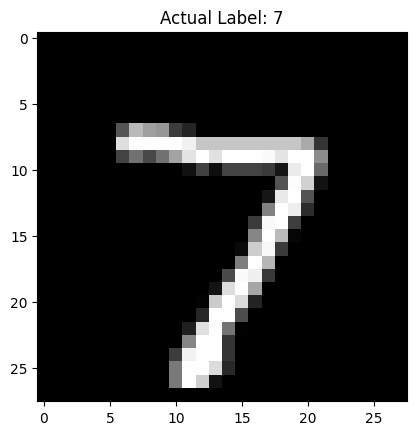

1/1 [==============================] - 0s 40ms/step
Predicted Label: 7



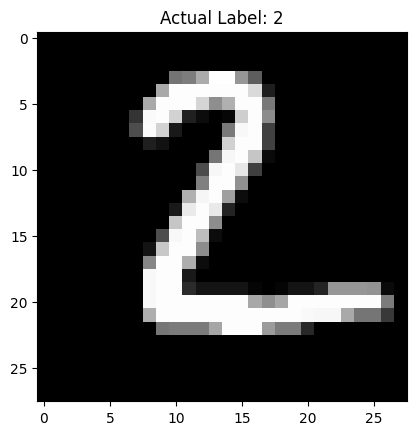

1/1 [==============================] - 0s 25ms/step
Predicted Label: 2



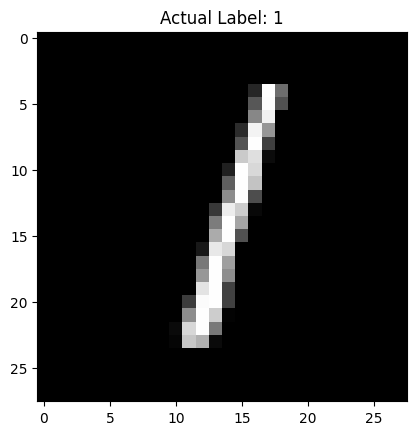

1/1 [==============================] - 0s 22ms/step
Predicted Label: 1



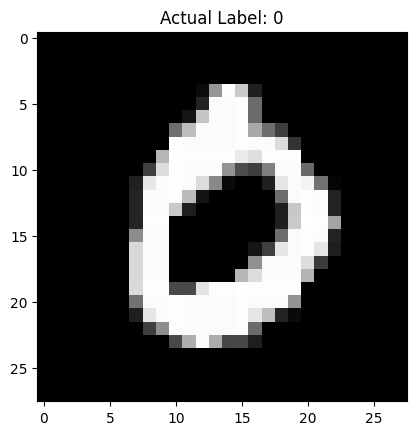

1/1 [==============================] - 0s 33ms/step
Predicted Label: 0



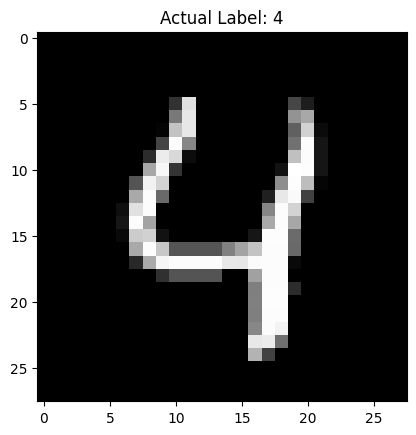

1/1 [==============================] - 0s 19ms/step
Predicted Label: 4



In [3]:
    import tensorflow as tf
    import numpy as np
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Flatten, Dense, Activation
    import matplotlib.pyplot as plt

    # Step 1: Import necessary libraries

    # Step 2: Download dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Step 3: Convert pixels into floating-point values
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale

    # Step 4: Create model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Step 5: Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Step 6: Fit model
    history = model.fit(x_train, y_train, epochs=5)

    # Step 7: Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Test accuracy:', test_acc)

    # Step 8: Display some images and make predictions
    num_images_to_display = 5

    for i in range(num_images_to_display):
        plt.imshow(x_test[i], cmap='gray')
        plt.title(f"Actual Label: {y_test[i]}")
        plt.show()

        # Make predictions
        prediction = model.predict(np.expand_dims(x_test[i], axis=0))
        predicted_label = np.argmax(prediction)
        print(f"Predicted Label: {predicted_label}\n")

Epoch 1/10
1563/1563 [==============================] - 54s 29ms/step - loss: 1.5486 - accuracy: 0.4310 - val_loss: 1.3005 - val_accuracy: 0.5291
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1596 - accuracy: 0.5898 - val_loss: 1.1325 - val_accuracy: 0.5972
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0118 - accuracy: 0.6456 - val_loss: 1.0792 - val_accuracy: 0.6174
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9146 - accuracy: 0.6788 - val_loss: 1.0492 - val_accuracy: 0.6375
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8472 - accuracy: 0.7041 - val_loss: 0.9276 - val_accuracy: 0.6762
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7958 - accuracy: 0.7216 - val_loss: 0.9455 - val_accuracy: 0.6834
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7435 - accuracy: 0.7389 - val_loss: 0.8610 -

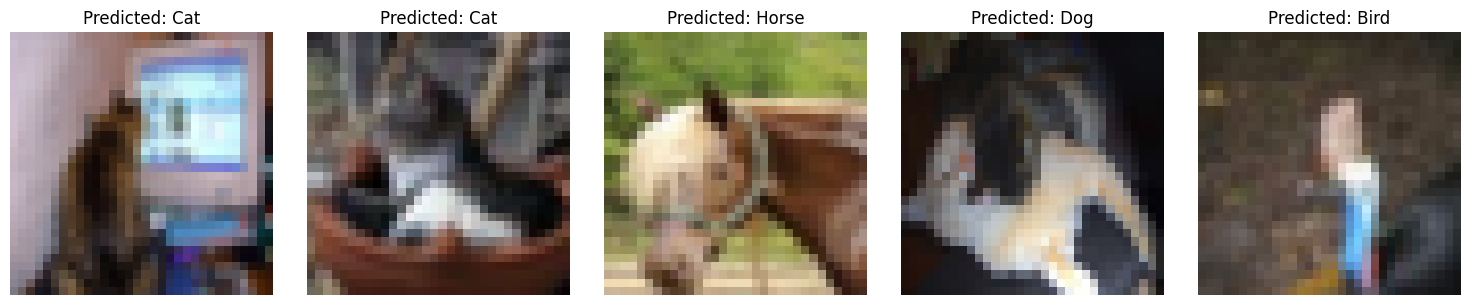

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Display sample images with predictions
sample_indices = np.random.choice(x_test.shape[0], size=5, replace=False)
sample_images = x_test[sample_indices]
predicted_probabilities = model.predict(sample_images)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

plt.figure(figsize=(15, 3))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Predicted: {class_names[predicted_classes[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# RNN

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
%matplotlib inline

t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2

train,test = x[0:1000], x[1000:]

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)
train_step = 10
test_step = 20

trainX,trainY =convertToDataset(train,train_step)
testX,testY =convertToDataset(test,test_step)

trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))
print(trainX.shape)
print(testX.shape)

def build_model(sequence_length):
    model = Sequential()
    model.add(SimpleRNN(units=64, input_shape=(sequence_length, 1),  activation="tanh"))
    model.add(Dense(1))
    return model
model = build_model(10)
model.summary()

model.input

model.compile(loss='mean_squared_error', optimizer='adam')
# Directory where the checkpoints will be saved
checkpoint_dir = './notebook02_training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
history = model.fit(trainX,trainY, epochs=100, batch_size=16,
                    verbose=2, callbacks=[checkpoint_callback])

tf.train.latest_checkpoint(checkpoint_dir)

model = build_model(20)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.compile(loss='mean_squared_error', optimizer='adam')
trainScore = model.evaluate(testX, testY, verbose=0)
print(trainScore)

(990, 10, 1)
(480, 20, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
62/62 - 1s - loss: 0.4263 - 1s/epoch - 20ms/step
Epoch 2/100
62/62 - 0s - loss: 0.3937 - 328ms/epoch - 5ms/step
Epoch 3/100
62/62 - 0s - loss: 0.3934 - 390ms/epoch - 6ms/step
Epoch 4/100
62/62 - 0s - loss: 0.3828 - 317ms/epoch - 5ms/step
Epoch 5/100
62/62 - 0s - loss: 0.3719 - 322ms/epoch - 5ms/step
Epoch 6/100
62/62 - 0s - loss: 0.3722 - 318ms/epoch - 5ms/step
Epoch 7/100
62

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
41/41 - 2s - loss: 0.5421 - 2s/epoch - 41ms/step
Epoch 2/150
41/41 - 0s - loss: 0.3792 - 370ms/epoch - 9ms/step
Epoch 3/150
41/41 - 0s - loss: 0.3635 - 402ms/epoch - 10ms/step
Epoch 4/150
41/41 - 0s - loss: 0.3498 - 333ms/epoch - 8ms/step
Epoch 5/150
41/41 - 0s - loss: 0.3497 - 318ms/epoch - 8ms/step
Epoch 6/150
41/41 - 0s - loss: 0.3493 - 257ms/epoch - 6ms/step
Epoch 7/150
41/41 - 0s - loss: 0.3568 -

Epoch 117/150
41/41 - 1s - loss: 0.0591 - 794ms/epoch - 19ms/step
Epoch 118/150
41/41 - 1s - loss: 0.0646 - 1s/epoch - 25ms/step
Epoch 119/150
41/41 - 1s - loss: 0.0590 - 620ms/epoch - 15ms/step
Epoch 120/150
41/41 - 1s - loss: 0.0562 - 547ms/epoch - 13ms/step
Epoch 121/150
41/41 - 1s - loss: 0.0555 - 572ms/epoch - 14ms/step
Epoch 122/150
41/41 - 0s - loss: 0.0575 - 452ms/epoch - 11ms/step
Epoch 123/150
41/41 - 1s - loss: 0.0545 - 621ms/epoch - 15ms/step
Epoch 124/150
41/41 - 1s - loss: 0.0582 - 653ms/epoch - 16ms/step
Epoch 125/150
41/41 - 1s - loss: 0.0621 - 618ms/epoch - 15ms/step
Epoch 126/150
41/41 - 0s - loss: 0.0517 - 455ms/epoch - 11ms/step
Epoch 127/150
41/41 - 0s - loss: 0.0466 - 490ms/epoch - 12ms/step
Epoch 128/150
41/41 - 1s - loss: 0.0455 - 759ms/epoch - 19ms/step
Epoch 129/150
41/41 - 1s - loss: 0.0444 - 623ms/epoch - 15ms/step
Epoch 130/150
41/41 - 0s - loss: 0.0515 - 489ms/epoch - 12ms/step
Epoch 131/150
41/41 - 3s - loss: 0.0491 - 3s/epoch - 63ms/step
Epoch 132/150
41

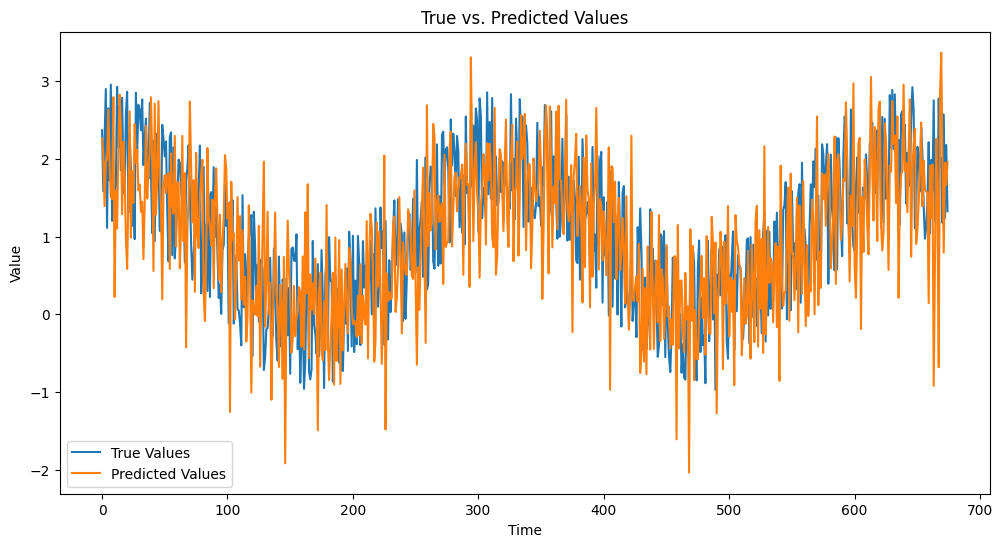

In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Generate sample data
t = np.arange(0, 2000)  # Changed to 2000
x = np.sin(0.02 * t) + np.random.rand(2000) * 2  # Changed to 2000

# Split data into train and test sets
train_data, test_data = x[0:1300], x[1300:]  # Changed split point

# Function to convert data into dataset and label
def convertToDataset(data, step):
    X, Y = [], []
    for i in range(len(data) - step):
        d = i + step
        X.append(data[i:d])
        Y.append(data[d])
    return np.array(X), np.array(Y)

train_step = 15  # Changed to 15
test_step = 25  # Changed to 25

# Convert data to dataset and labels
trainX, trainY = convertToDataset(train_data, train_step)
testX, testY = convertToDataset(test_data, test_step)

# Reshape the data for RNN input
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Build the RNN model
def build_model(sequence_length):
    model = Sequential()
    model.add(SimpleRNN(units=64, input_shape=(sequence_length, 1), activation="tanh"))
    model.add(Dense(1))
    return model

# Create the model
model = build_model(15)  # Changed to match train_step
model.summary()

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Directory to save checkpoints
checkpoint_dir = './my_training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

# Create a checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

# Train the model
history = model.fit(trainX, trainY, epochs=150, batch_size=32,  # Changed epochs and batch_size
                    verbose=2, callbacks=[checkpoint_callback])

# Load model weights from the latest checkpoint
model = build_model(25)  # Changed to match test_step
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Evaluate the model on test data
testScore = model.evaluate(testX, testY, verbose=0)
print("Test loss:", testScore)

# Test the model by making predictions
predicted_output = model.predict(testX)
plt.figure(figsize=(12, 6))
plt.plot(testY, label="True Values")
plt.plot(predicted_output, label="Predicted Values")
plt.legend()
plt.title("True vs. Predicted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


# AutoEncoder

In [1]:
# import library

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# download data MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
X_train[0].shape

(28, 28)

In [4]:
encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(30, activation='relu')

])

In [5]:
decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape([28, 28])
])

In [6]:
autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [7]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                110686    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            111440    
                                                                 
Total params: 222126 (867.68 KB)
Trainable params: 222126 (867.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

In [9]:
autoencoder.fit(X_train, X_train,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 5ms/step - loss: 0.1511
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1086
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1002
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0958
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0931
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0911
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0896
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0884
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0876
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0869


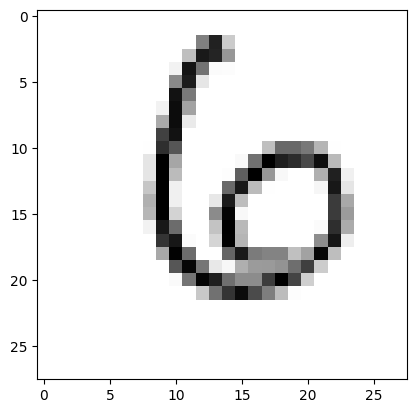

In [10]:
plt.imshow(X_test[100], cmap='binary')

1/1 [==============================] - 1s 860ms/step


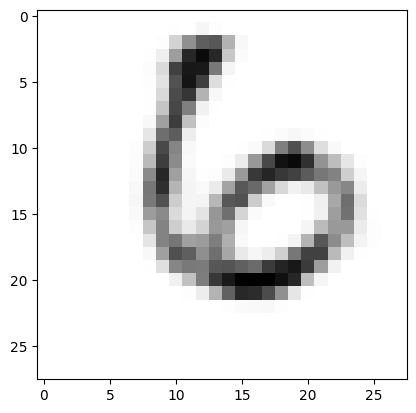

In [11]:
pred = autoencoder.predict(X_test[100].reshape((1,28,28)))
plt.imshow(pred.reshape((28,28)), cmap='binary')

1/1 [==============================] - 0s 56ms/step


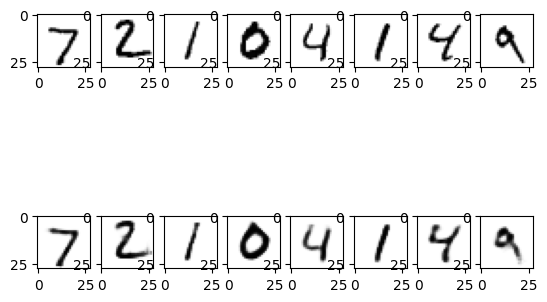

In [12]:
import matplotlib.pyplot as plt
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = autoencoder.predict(X_test[i].reshape((1,28,28)))
  plt.imshow(X_test[i], cmap='binary')

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28,28)), cmap='binary')

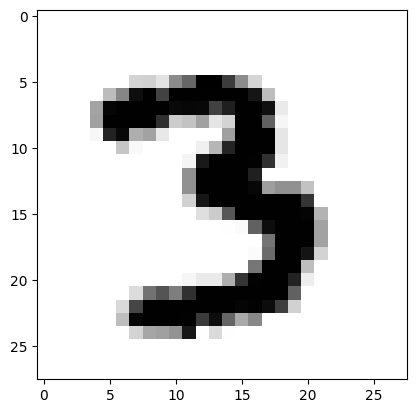

In [13]:
data_ke =500

plt.imshow(X_test[data_ke], cmap='binary')

1/1 [==============================] - 0s 218ms/step


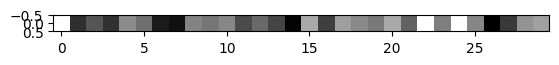

In [14]:
latent_vector = encoder.predict(X_test[data_ke].reshape((1,28,28)))
plt.imshow(latent_vector, cmap="binary")

1/1 [==============================] - 0s 68ms/step


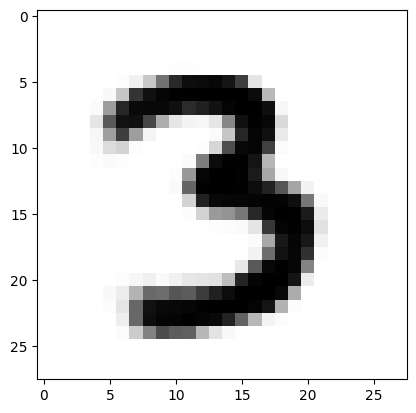

In [15]:
prediction = autoencoder.predict(X_test[data_ke].reshape((1,28,28)))
plt.imshow(prediction.reshape((28,28)), cmap="binary")

In [16]:
res = decoder.predict(latent_vector)

1/1 [==============================] - 0s 245ms/step


In [17]:
latent_0 = encoder.predict(X_test[6].reshape((1,28,28)))
latent_2 = encoder.predict(X_test[7].reshape((1,28,28)))

1/1 [==============================] - 0s 69ms/step


In [18]:
latent_eksperimen = 0.75*latent_0 + 0.25*latent_2

1/1 [==============================] - 0s 151ms/step


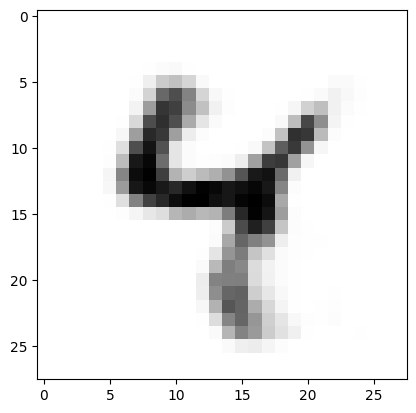

In [19]:
prediksi = decoder.predict(latent_eksperimen)
plt.imshow(prediksi.reshape((28,28)), cmap="binary")

In [20]:
# Autoencoder CNN
encoder = tf.keras.models.Sequential([
                tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
                tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
])

In [21]:
decoder = tf.keras.models.Sequential([
                 tf.keras.layers.Conv2DTranspose(32, kernel_size=(3,3), strides=2, padding='valid',
                                                 activation='relu',
                                                 input_shape=[3, 3, 64]),
                 tf.keras.layers.Conv2DTranspose(16, kernel_size=(3,3), strides=2, padding='same',
                                                 activation='relu'),
                 tf.keras.layers.Conv2DTranspose(1, kernel_size=(3,3), strides=2, padding='same',
                                                 activation='sigmoid'),
                 tf.keras.layers.Reshape([28,28])
])

In [22]:
autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [23]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
autoencoder.fit(X_train, X_train,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 67s 33ms/step - loss: 0.1223
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0815
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0770
Epoch 4/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0745
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0729
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0718
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0710
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0704
Epoch 9/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0699
Epoch 10/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0696


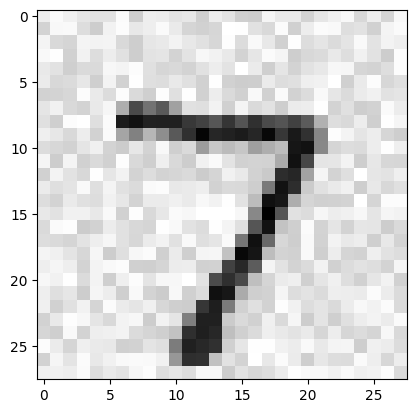

In [25]:
import numpy as np
noise = np.random.random((28,28))/4
plt.imshow(X_test[0]+ noise, cmap='binary')

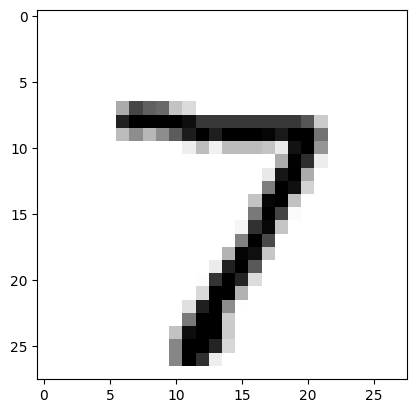

In [26]:
plt.imshow(X_test[0], cmap='binary')

In [27]:
encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(30, activation='relu')

])

In [28]:
decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape([28, 28])
])

In [29]:
autoencoder = tf.keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

In [30]:
noise = np.random.random((28,28))/4
X_train_noise = X_train + noise


In [31]:
X_test_noise = X_test + noise

In [32]:
autoencoder.fit(X_train_noise, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.1523
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1115
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1030
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0988
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0957
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0936
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0922
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0909
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0900
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0892


1/1 [==============================] - 0s 77ms/step


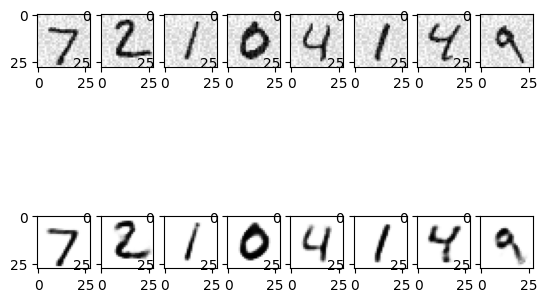

In [33]:
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = autoencoder.predict(X_test_noise[i].reshape((1,28,28)))
  plt.imshow(X_test_noise[i], cmap='binary')

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28,28)), cmap='binary')

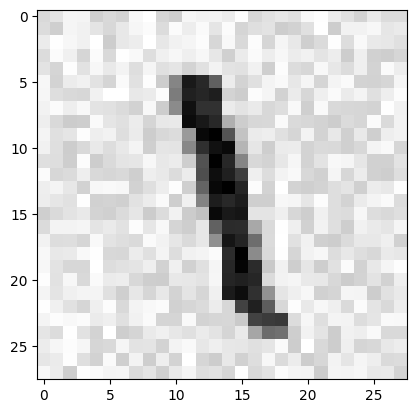

In [34]:
plt.imshow(X_test_noise[700], cmap='binary')

1/1 [==============================] - 0s 33ms/step


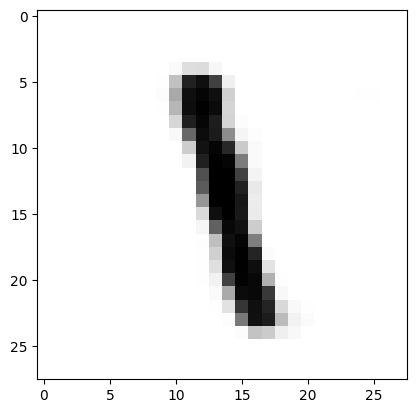

In [35]:
pred = autoencoder.predict(X_test_noise[700].reshape((1,28,28)))
plt.imshow(pred.reshape((28,28)), cmap='binary')

######################

In [ ]:
# import library

import tensorflow as tf
import matplotlib.pyplot as plt

# download data MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train[0].shape

encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(30, activation='relu')

])

decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape([28, 28])
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.summary()

autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

autoencoder.fit(X_train, X_train,  epochs=10)

plt.imshow(X_test[100], cmap='binary')

pred = autoencoder.predict(X_test[100].reshape((1,28,28)))
plt.imshow(pred.reshape((28,28)), cmap='binary')

import matplotlib.pyplot as plt
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = autoencoder.predict(X_test[i].reshape((1,28,28)))
  plt.imshow(X_test[i], cmap='binary')

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28,28)), cmap='binary')

data_ke =500

plt.imshow(X_test[data_ke], cmap='binary')

latent_vector = encoder.predict(X_test[data_ke].reshape((1,28,28)))
plt.imshow(latent_vector, cmap="binary")

prediction = autoencoder.predict(X_test[data_ke].reshape((1,28,28)))
plt.imshow(prediction.reshape((28,28)), cmap="binary")

res = decoder.predict(latent_vector)

latent_0 = encoder.predict(X_test[6].reshape((1,28,28)))
latent_2 = encoder.predict(X_test[7].reshape((1,28,28)))

latent_eksperimen = 0.75*latent_0 + 0.25*latent_2

prediksi = decoder.predict(latent_eksperimen)
plt.imshow(prediksi.reshape((28,28)), cmap="binary")

# Autoencoder CNN
encoder = tf.keras.models.Sequential([
                tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
                tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
])

decoder = tf.keras.models.Sequential([
                 tf.keras.layers.Conv2DTranspose(32, kernel_size=(3,3), strides=2, padding='valid',
                                                 activation='relu',
                                                 input_shape=[3, 3, 64]),
                 tf.keras.layers.Conv2DTranspose(16, kernel_size=(3,3), strides=2, padding='same',
                                                 activation='relu'),
                 tf.keras.layers.Conv2DTranspose(1, kernel_size=(3,3), strides=2, padding='same',
                                                 activation='sigmoid'),
                 tf.keras.layers.Reshape([28,28])
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

autoencoder.fit(X_train, X_train,  epochs=10)

import numpy as np
noise = np.random.random((28,28))/4
plt.imshow(X_test[0]+ noise, cmap='binary')

plt.imshow(X_test[0], cmap='binary')

encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(30, activation='relu')

])

decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape([28, 28])
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

noise = np.random.random((28,28))/4
X_train_noise = X_train + noise


X_test_noise = X_test + noise

autoencoder.fit(X_train_noise, X_train, epochs=10)

for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = autoencoder.predict(X_test_noise[i].reshape((1,28,28)))
  plt.imshow(X_test_noise[i], cmap='binary')

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28,28)), cmap='binary')

plt.imshow(X_test_noise[700], cmap='binary')

pred = autoencoder.predict(X_test_noise[700].reshape((1,28,28)))
plt.imshow(pred.reshape((28,28)), cmap='binary')

# Fashion MNIST

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 30)                110686    
                                                                 
 sequential_10 (Sequential)  (None, 28, 28)            111440    
                                                                 
Total params: 222126 (867.68 KB)
Trainable params: 222126 (867.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 47s 17ms/step - loss: 0.3194
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2913
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2856
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2825
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss

C:\Users\ramch\AppData\Local\Temp\ipykernel_9016\3208314483.py:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 8, i+1)


1/1 [==============================] - 0s 41ms/step
Epoch 1/10
1875/1875 [==============================] - 60s 26ms/step - loss: 0.3116
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2758
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2706
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2677
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2657
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2643
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2632
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2624
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2617
Epoch 10/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2612
Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.3170
Epoch 2/10
18

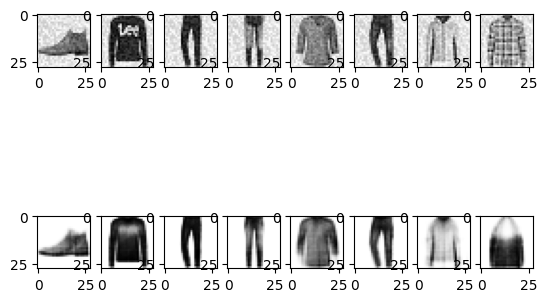

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

# download data Fashion MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train[0].shape

encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(30, activation='relu')

])

decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape([28, 28])
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.summary()

autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

autoencoder.fit(X_train, X_train,  epochs=10)

plt.imshow(X_test[100], cmap='binary')

pred = autoencoder.predict(X_test[100].reshape((1,28,28)))
plt.imshow(pred.reshape((28,28)), cmap='binary')

import matplotlib.pyplot as plt
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = autoencoder.predict(X_test[i].reshape((1,28,28)))
  plt.imshow(X_test[i], cmap='binary')

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28,28)), cmap='binary')

data_ke =500

plt.imshow(X_test[data_ke], cmap='binary')

latent_vector = encoder.predict(X_test[data_ke].reshape((1,28,28)))
plt.imshow(latent_vector, cmap="binary")

prediction = autoencoder.predict(X_test[data_ke].reshape((1,28,28)))
plt.imshow(prediction.reshape((28,28)), cmap="binary")

res = decoder.predict(latent_vector)

latent_0 = encoder.predict(X_test[6].reshape((1,28,28)))
latent_2 = encoder.predict(X_test[7].reshape((1,28,28)))

latent_eksperimen = 0.75*latent_0 + 0.25*latent_2

prediksi = decoder.predict(latent_eksperimen)
plt.imshow(prediksi.reshape((28,28)), cmap="binary")

# Autoencoder CNN
encoder = tf.keras.models.Sequential([
                tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
                tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
])

decoder = tf.keras.models.Sequential([
                 tf.keras.layers.Conv2DTranspose(32, kernel_size=(3,3), strides=2, padding='valid',
                                                 activation='relu',
                                                 input_shape=[3, 3, 64]),
                 tf.keras.layers.Conv2DTranspose(16, kernel_size=(3,3), strides=2, padding='same',
                                                 activation='relu'),
                 tf.keras.layers.Conv2DTranspose(1, kernel_size=(3,3), strides=2, padding='same',
                                                 activation='sigmoid'),
                 tf.keras.layers.Reshape([28,28])
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

autoencoder.fit(X_train, X_train,  epochs=10)

import numpy as np
noise = np.random.random((28,28))/4
plt.imshow(X_test[0]+ noise, cmap='binary')

plt.imshow(X_test[0], cmap='binary')

encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(30, activation='relu')

])

decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape([28, 28])
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

noise = np.random.random((28,28))/4
X_train_noise = X_train + noise


X_test_noise = X_test + noise

autoencoder.fit(X_train_noise, X_train, epochs=10)

for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = autoencoder.predict(X_test_noise[i].reshape((1,28,28)))
  plt.imshow(X_test_noise[i], cmap='binary')

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28,28)), cmap='binary')

plt.imshow(X_test_noise[700], cmap='binary')

pred = autoencoder.predict(X_test_noise[700].reshape((1,28,28)))
plt.imshow(pred.reshape((28,28)), cmap='binary')